In [1]:
from tensorflow.keras import models

model = models.load_model("dnn")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              103424    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,284,353
Trainable params: 1,284,353
Non-trainable params: 0
_________________________________________________________________


In [2]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

def word2vec(ar, model):
    para_avg_vec = []
    # print("training finished")
    # 对每一段
    for para in ar:
        sum_vec = np.zeros(100)
        # 对每一段中每一个词
        for word in para:
            try:
                # 试着从模型中取得word vector
                sum_vec += model.wv[word]
            except(KeyError):
                # 如果有未记录的特殊符号，就跳过
                continue
        # 对词向量求平均得到句子的向量表示
        para_avg_vec.append(sum_vec / len(para))
    return para_avg_vec

df = pd.read_csv("merge.csv", encoding="gbk")
word_2_vec_model = Word2Vec.load('w2v_model')
vec = word2vec(np.array(df["文章详情"]), word_2_vec_model)

In [3]:
vec[-1]

array([ 0.12322522, -0.13826187, -0.30714408,  0.55668855, -0.13554483,
        0.32464452,  0.30069211, -0.2362495 ,  0.40808932, -0.18614346,
        0.9166102 ,  0.41914576,  0.07479357,  0.18455635,  0.0395265 ,
        0.0678133 ,  0.49454343,  0.07893525,  0.09481257, -0.18241158,
        0.07199739, -0.60896909,  0.42558284,  0.25320531, -0.23331592,
        0.02720025,  0.01585316,  0.2078829 , -0.11519456,  0.03947824,
       -0.06173475, -0.48109466,  0.38364394, -0.13045178, -0.00929339,
       -0.33216176, -0.09494101,  0.14784834, -0.1970002 ,  0.72413582,
        0.26803732, -0.43361117, -0.11953155,  0.32596177, -0.17277969,
       -0.2841571 ,  0.27736774, -0.12358161,  0.14261866,  0.13780758,
        0.07720982,  0.06441273, -0.20677226,  0.59332892, -0.32011405,
        0.11124099, -0.02018568, -0.36246632,  0.18939965, -0.1713358 ,
        0.07171642, -0.56724752,  0.361508  ,  0.35523676, -0.03063113,
        0.09638654, -0.01438554,  0.23810508,  0.04425549,  0.10

In [5]:
import tensorflow as tf

x = tf.convert_to_tensor(vec)
df["predict"] = model.predict(x)

18473/18473 [==============================] - 59s 3ms/step


In [6]:
def transform(pred, num=[0, 2], num_labels=3):
    delta = num[1] - num[0]
    d = delta / num_labels
    for i in range(len(pred)):
        c = 0
        if pred[i] <= num[0] + d:
            pred[i] = c
        elif pred[i] <= num[0] + 2*d:
            pred[i] = c + 1
        else:
            pred[i] = c + 2
    return pred
df["predict"] = transform(df["predict"])
df["predict"]

E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0         2.0
1         2.0
2         2.0
3         1.0
4         2.0
         ... 
591108    1.0
591109    1.0
591110    1.0
591111    1.0
591112    1.0
Name: predict, Length: 591113, dtype: float32

In [7]:
df.set_index(["时间", "股票代码"], inplace=True)
df

文章标题  \
时间         股票代码                                                 
2022/3/17  000001.SZ           归母营运利润稳健增长6.1% 十大亮点看懂平安2021年业绩   
           000001.SZ             平安银行：2021年经营业绩大幅增长 资产质量创六年最优   
2022/3/16  000001.SZ            归母利润同比增25.6% 平安银行董事长谢永林详解经营之道   
           000001.SZ  【读财报】银行理财业务消费投诉排名：邮储银行、招商银行、平安银行投诉量位居前列   
2022/3/15  000001.SZ                    平安银行2021年报发布——谢永林的信与行   
...                                                       ...   
2020/10/16 689009.SH                科创板首单CDR九号公司：发行价格18.94元/份   
           689009.SH             既不机器人也不智能 科创板CDR第一股如何走出小米困境？   
           689009.SH              九号公司敲定发行价 A股将迎首家“VIE+CDR”企业   
2020/10/15 689009.SH               价格定了 雷军该笑了！科创板CDR第一股上市再迈一步   
2020/9/25  689009.SH             九号公司获科创板IPO注册 为A股首单VIE+CDR企业   

                                                                   文章详情  \
时间         股票代码                                                           
2022/3/17  000001.SZ  　　3月17日，中国平安公布2021年度业绩。\n 　　过去 一年，面对复杂严峻的外部环境与...   
           000001.SZ  　　20220314 【金融机构财报解读】平安银行：2021年经营业绩大幅增长，资产质量创六...   
2022/3/16  000001.SZ  　　3月10日，平安银行举办了2021年度业绩发布会，业绩报告显示，2021年度，平安银行实...   
           000001.SZ  　　编者按：　　哪些银行理财相关业务消费者投诉量大？哪些银行消费者投诉量增长快？　　中国银保...   
2022/3/15  000001.SZ  　　2022年3月10日，平安银行召开2021年度业绩发布会，平安集团总经理兼联席CEO、平...   
...                                                                 ...   
2020/10/16 689009.SH  　　10月15日晚间，九号公司发布公告，发行人和保荐机构(主承销商)根据初步询价结果，综合考...   
           689009.SH  　　科创板首家申请发行CDR(存托凭证)的企业九号有限公司(<em>689009</em>....   
           689009.SH  　　A股首例发行CDR(中国存托凭证)的VIE架构红筹企业敲定发行价。　　10月15日晚间，...   
2020/10/15 689009.SH  　　刚刚，九号公司CDR的发行价定了！　　10月15日晚，九号公司公告称，本次发行价格为18...   
2020/9/25  689009.SH  　　历经524天，九号公司终于等到了来自证监会的批文。9月22日，证监会披露公告，称同意九号...   

                      predict  
时间         股票代码                
2022/3/17  000001.SZ      2.0  
           000001.SZ      2.0  
2022/3/16  000001.SZ      2.0  
           000001.SZ      1.0  
2022/3/15  000001.SZ      2.0  
...                       ...  
2020/10/16 689009.SH      1.0  
           689009.SH      1.0  
           689009.SH      1.0  
2020/10/15 689009.SH      1.0  
2020/9/25  689009.SH      1.0  

[591113 rows x 3 columns]

In [8]:
index = df["predict"].groupby("时间").mean()
index.describe()

count    1886.000000
mean        1.245415
std         0.187885
min         0.000000
25%         1.143918
50%         1.246093
75%         1.354219
max         2.000000
Name: predict, dtype: float64

<AxesSubplot:xlabel='时间'>

E:\Anaconda3.5\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
E:\Anaconda3.5\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
E:\Anaconda3.5\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda3.5\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


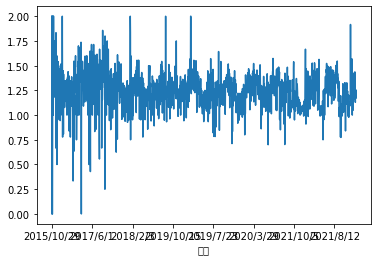

In [9]:
idx = pd.DataFrame({"index": index})
idx["index"].plot()

In [10]:
df.to_csv("D:/Desktop/result.csv", encoding="gbk")